# Курс "Python для анализа данных"

---
#6.3 Статистический анализ данных, получение корреляционных значений и отбор значимых признаков

## Где мы сейчас?


<html>
 <head>
  <meta charset="utf-8">
 </head>
 <body>
  <ul>
    <li>1. Введение в анализ данных и разработку на языке Python </li> 
    <li>2. Основы языка </li> 
    <li>3. Библиотеки NumPy и SciPy для решения задач анализа данных и машинного обучения </li> 
    <li>4. Библиотека Pandas для работы с высокоуровневыми структурами данных </li> 
    <li>5. Визуализации результатов анализа данных с использованием библиотек Matplotlib, Seaborn, Pandas </li>
    <li><strong>6. Роль и место библиотек языка Python в построении конвейера для обработки и анализа данных. Пример обработки известного датасета</strong> <i><- Вот в этой главе!</i></li>
     <ul>
      <li>6.1 Основы построения конвейера для обработки данных</li>
      <li>6.2 Библиотека Pandas для загрузки и первичной обработки исходных данных</li>
      <li><strong>6.3 Статистический анализ данных, получение корреляционных значений и отбор значимых признаков</strong><i><- Вот в этом параграфе!</i></li>
      <li>6.4 Итоговый вариант обработчика данных. Встраивание в процесс обучения модели машинного обучения</li>
     </ul>
    </li>   
  </ul>
 </body>
</html>

## О чем будем говорить?


О том, как можно проанализировать данные в датасете  ```Titanic``` для выбора значимых и получения новых признаков.

## Ключевые слова, понятия и выражения






*   ```Titanic```
*   ```pandas```
*   ```matplotlib```
*   ```seaborn```

## Материал

### Импорт и чтение данных

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files

In [ ]:
# Загрузка архива
files.upload()

Saving titanic.zip to titanic.zip


{'titanic.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00&\x12\x8bOA\xaa\xebr\xff\xff\xff\xff\xff\xff\xff\xff\x15\x00\x14\x00gender_submission.csv\x01\x00\x10\x00\xba\x0c\x00\x00\x00\x00\x00\x00h\x03\x00\x00\x00\x00\x00\x00-\x961\x8e\x1d7\x10Ds\x03\xbe\xc9\x06S\xd5$\xbby\x04g\x02t\x02\x01Z\x08J\x1cH\xb0\xce\xef\xbf[/*p\xf6\xe3\xa1\x9a3O\xad/\xdf~\xff~\xff\xf7\xc7\xfb\xaf\x7f\xbe\xbf}\xfd\xef\xd7\x9f\x9f\x7f\xde\xbf\xff\xfd\xd7\\\xbf=\x1fQo\xfa\x88\x95\xd3N\x9c<\xec\x9c&\xa7\xfbq\xba\xcf\xf3q\xba\x8frr\xa2\x12+\x7f\xdb9\x9d\x9c:1y\x18\x8aB\x91\x12\xa1(\x14\x85\xa2P\x14\x8a:\xa7\xc9)\x14?\x89tq(\x0e\xc5\xa1x\'N\x1e\x86\xe2P|?\xa3B\xa9P*\x94\n\xa5V"\x94J\x97\n\xa52Q\xa5\xcb\xcaD+\x13\xadPV(+]V(+]V(+\x94\x15\xcaN\x97\x1d\xca\x0ee\x87\xb2\xd3e\x87\xb2C\xd9\xb9\xdd\x9d\x89v(\'\x94\x13\xcaq"\x94\x93.\'\xb7{2\xd1I\x97\x93.\'\xf7\xd2\xa1t(\x9d.\x1dJ\xa7K\x87\xd2\xe9\xd2\xa1t\xbat(\x93{\x99\xdc\xee\xa4\xcb\x842\xe92\xa1L(\x13\xca\x842\x99\xe8\x86rC\xb9\xa1\xdcP\xf2\xed\xde|\xbb7\xdf\xee\xcd\xb7{o&\xca\x

In [ ]:
# Разархивирование
!unzip 'titanic.zip'
!ls

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
gender_submission.csv  sample_data  test.csv  titanic.zip  train.csv


In [ ]:
# Чтение данных
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Переиндексируем данные и удаляем некоторые столбцы
train_data.index = train_data.PassengerId
del train_data['PassengerId']

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Предобработка некоторых столбцов данных

In [ ]:
all_data = train_data.copy() 
# Наличие номера кабины
all_data['Has_Cabin'] = all_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Размер семьи
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

# Признак одинокого плавания
all_data['Is_alone'] = all_data["FamilySize"].apply(lambda x: 0 if x > 1 else 1)

In [ ]:
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Is_alone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In [ ]:
# Использование регулярных выражений для поиска сокращений нейтральных обращений
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Применение к столбцу Name
all_data['Title'] = all_data['Name'].apply(get_title)
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Is_alone,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,Mr


In [ ]:
# Просмотр результатов предобработки
all_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Lady          1
Ms            1
Name: Title, dtype: int64

In [ ]:
# Исправление опечаток и группировака редких обращений
all_data['Title'] = all_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss')
all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

In [ ]:
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Is_alone,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,Mr


In [ ]:
# Очистка данных от обработанных столбцов
all_data = all_data.drop(['Name','Ticket','Cabin'], axis = 1)

In [ ]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,FamilySize,Is_alone,Title
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,2,0,Mr
2,1,1,female,38.0,1,0,71.2833,C,1,2,0,Mrs
3,1,3,female,26.0,0,0,7.9250,S,0,1,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,1,2,0,Mrs
5,0,3,male,35.0,0,0,8.0500,S,0,1,1,Mr


### Визуализация статистической информации о данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

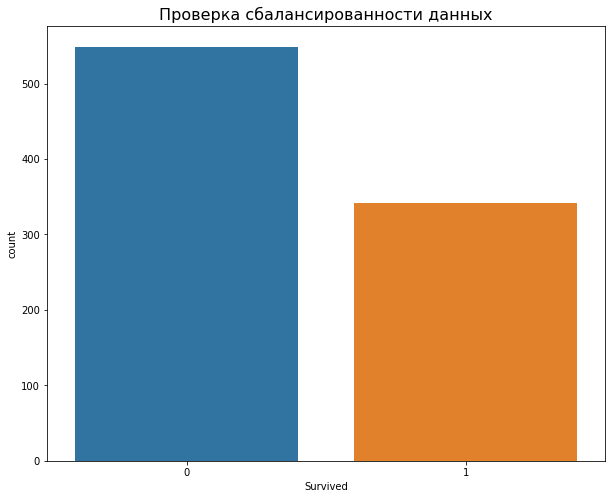

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Проверка сбалансированности данных', fontsize=16)
sns.countplot(x='Survived', data=all_data)

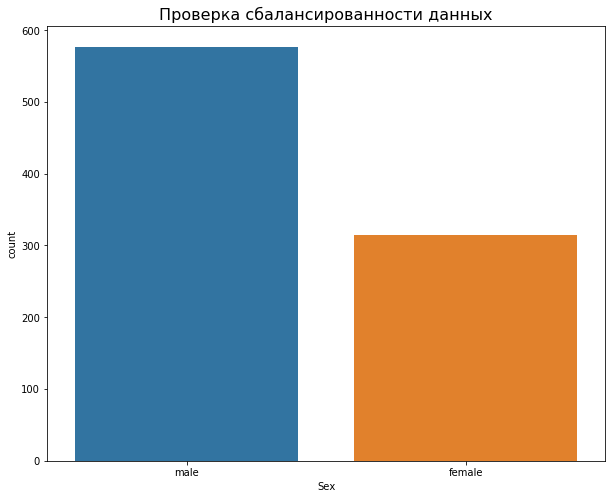

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Проверка сбалансированности данных', fontsize=16)
sns.countplot(x='Sex', data=all_data)

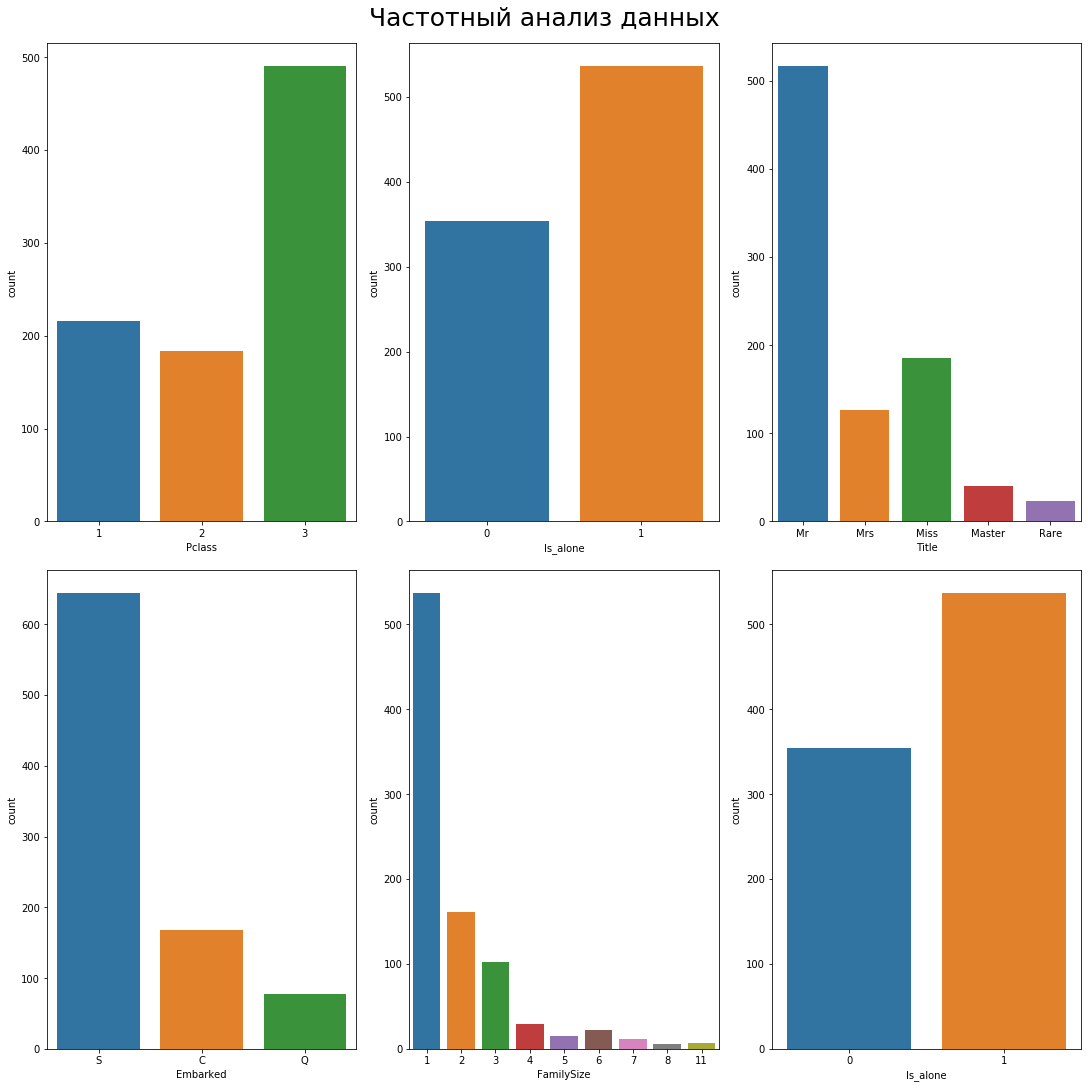

In [ ]:
fig, ax = plt.subplots(2,3, sharex=False, sharey=False,figsize=(15,15), constrained_layout=True)
fig.suptitle('Частотный анализ данных', fontsize=25)
sns.countplot(x="Pclass", data=all_data, ax=ax[0,0])
sns.countplot(x="Is_alone", data=all_data, ax=ax[0,1])
sns.countplot(x="Title", data=all_data, ax = ax[0,2])

sns.countplot(x="Embarked", data=all_data, ax=ax[1,0])
sns.countplot(x="FamilySize", data=all_data, ax=ax[1,1])
sns.countplot(x="Is_alone", data=all_data, ax = ax[1,2])

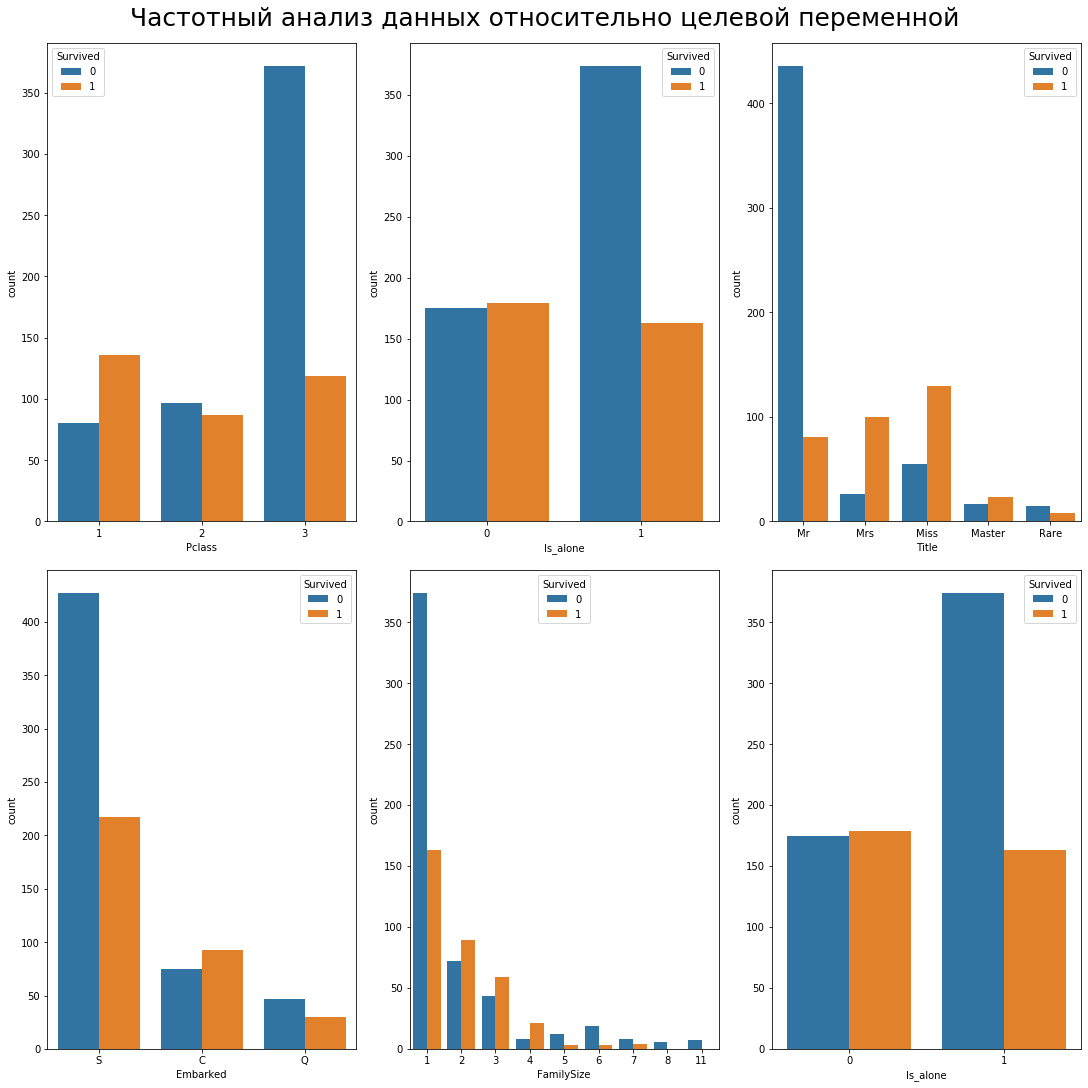

In [ ]:
fig, ax = plt.subplots(2,3, sharex=False, sharey=False,figsize=(15,15), constrained_layout=True)
fig.suptitle('Частотный анализ данных относительно целевой переменной', fontsize=25)

sns.countplot(x="Pclass", hue='Survived', data=all_data, ax=ax[0,0])
sns.countplot(x="Is_alone", hue='Survived',data=all_data, ax=ax[0,1])
sns.countplot(x="Title", hue='Survived',data=all_data, ax = ax[0,2])

sns.countplot(x="Embarked", hue='Survived',data=all_data, ax=ax[1,0])
sns.countplot(x="FamilySize", hue='Survived',data=all_data, ax=ax[1,1])
sns.countplot(x="Is_alone", hue='Survived',data=all_data, ax = ax[1,2])

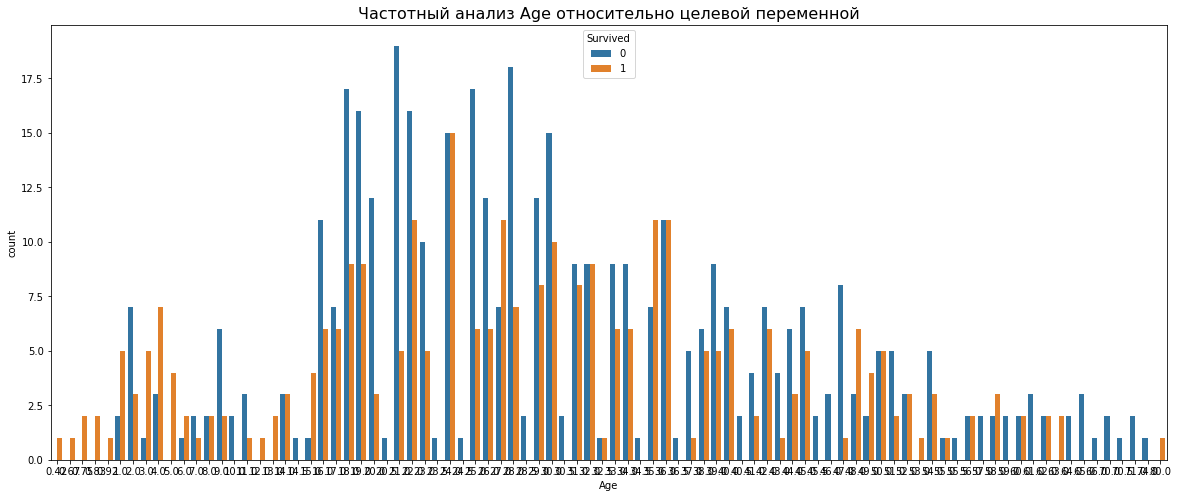

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Частотный анализ Age относительно целевой переменной', fontsize=16)
sns.countplot(x="Age", hue='Survived', data=all_data)

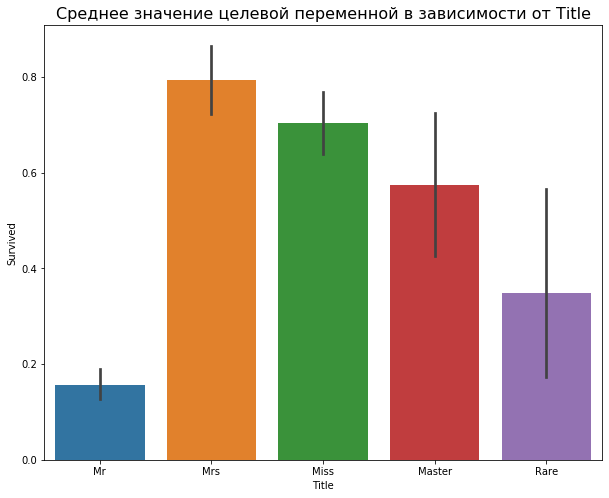

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от Title', fontsize=16)
sns.barplot(x="Title", y="Survived", data=all_data)

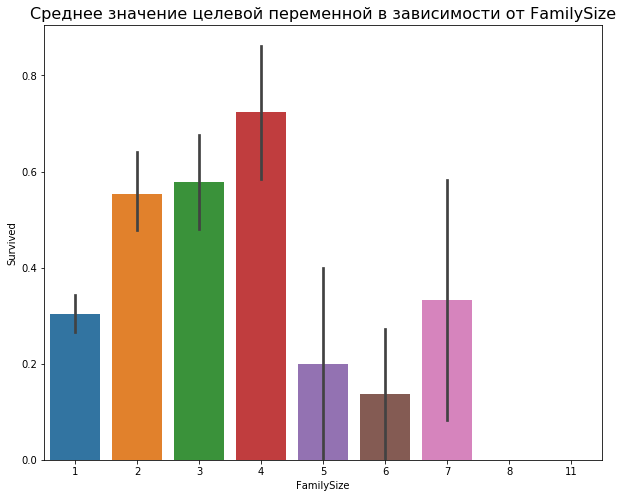

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от FamilySize', fontsize=16)

sns.barplot(x="FamilySize", y="Survived", data=all_data)

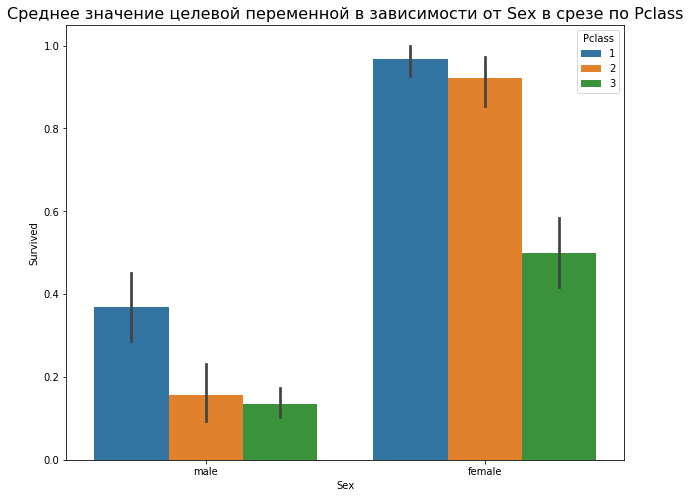

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от Sex в срезе по Pclass', fontsize=16)

sns.barplot(x="Sex", y="Survived", hue='Pclass', data=all_data)

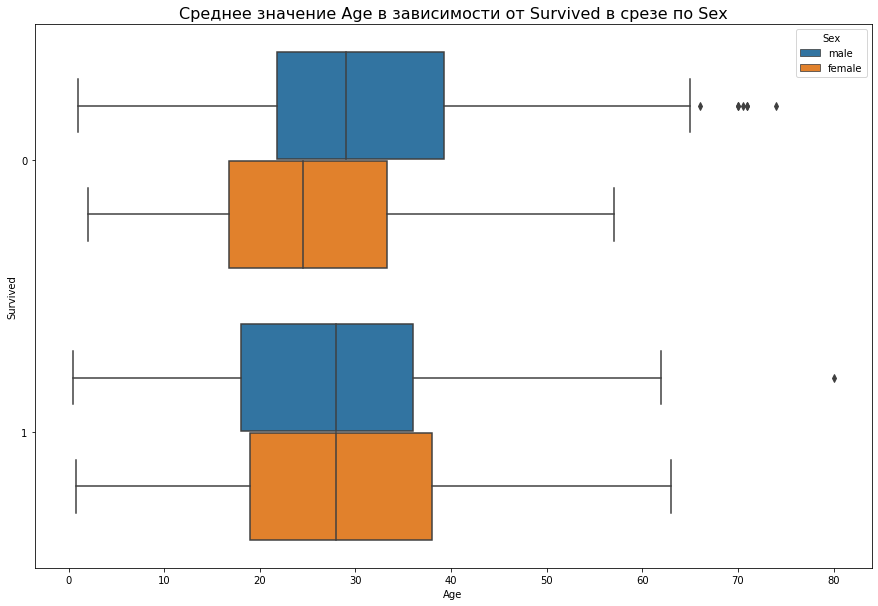

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Среднее значение Age в зависимости от Survived в срезе по Sex', fontsize=16)
sns.boxplot(x="Age", y="Survived", hue="Sex", orient="h", data=all_data)

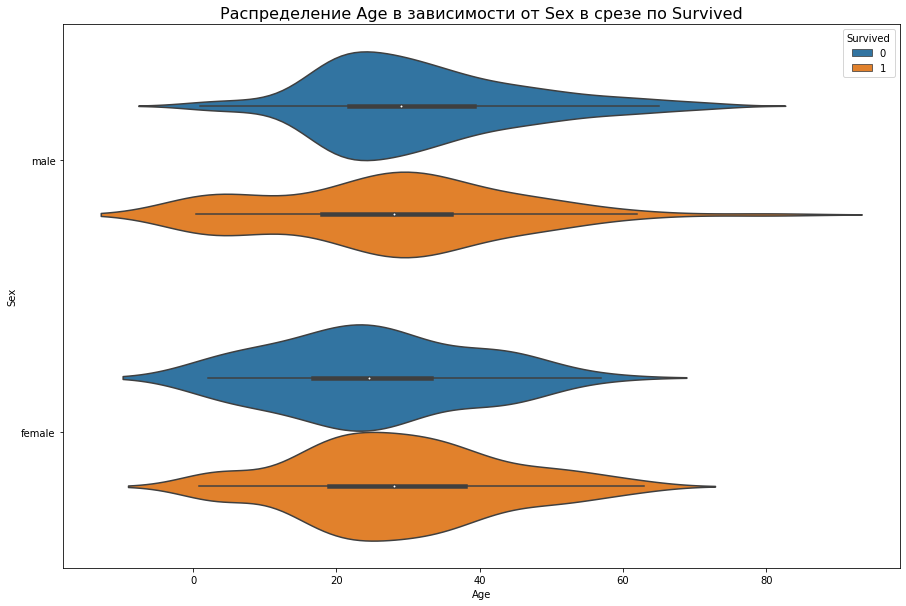

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Распределение Age в зависимости от Sex в срезе по Survived', fontsize=16)
sns.violinplot(x="Age", y="Sex", hue="Survived", orient="h", data=all_data)

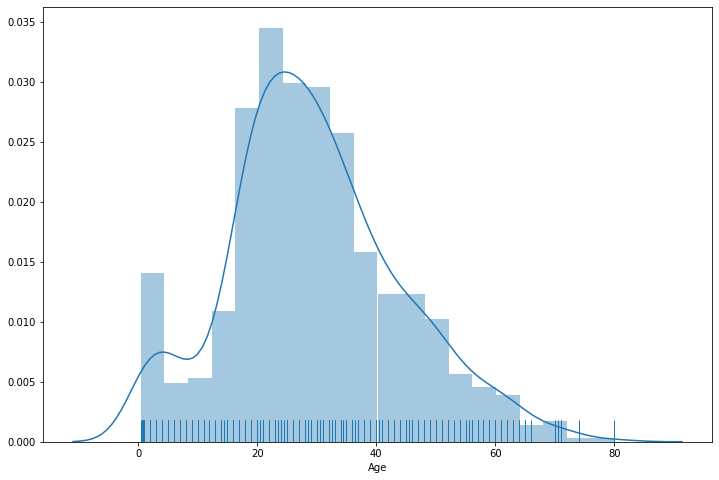

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(all_data['Age'],rug=True)

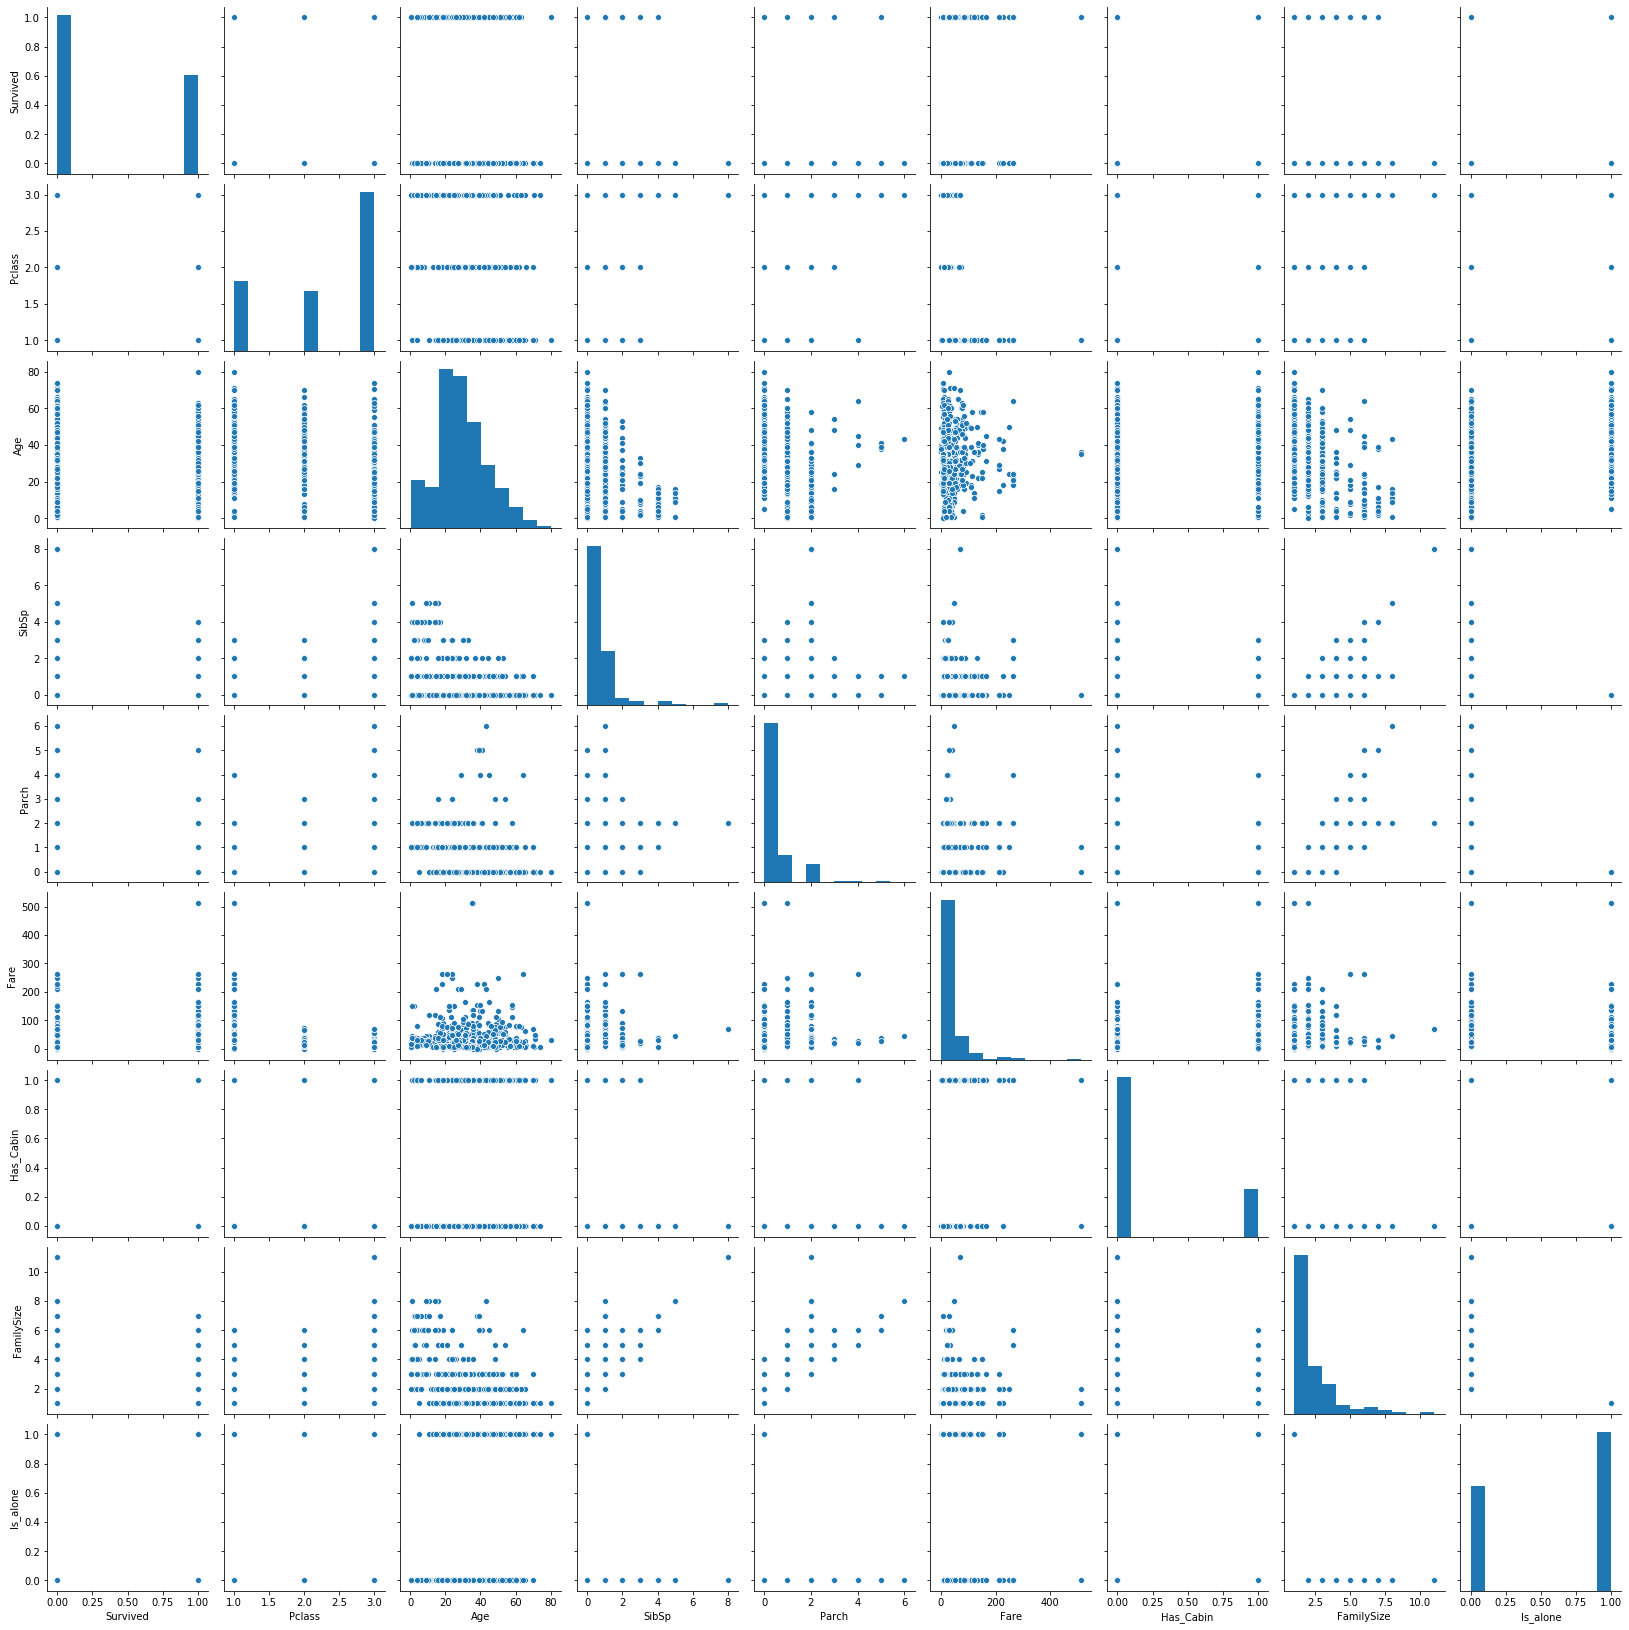

In [ ]:
sns.pairplot(all_data)

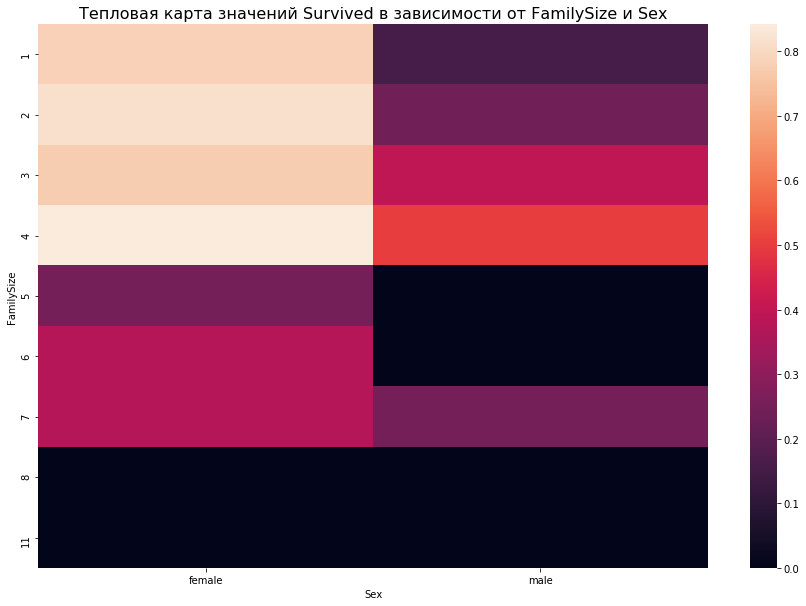

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Тепловая карта значений Survived в зависимости от FamilySize и Sex', fontsize=16)

sns.heatmap(all_data.groupby(['FamilySize','Sex'])['Survived'].mean().unstack().fillna(0))

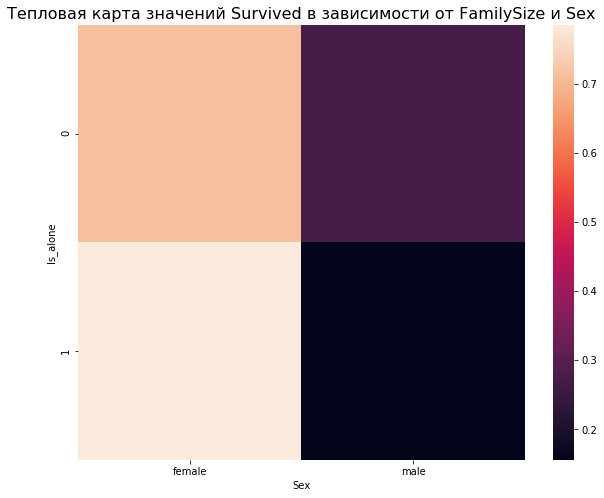

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Тепловая карта значений Survived в зависимости от FamilySize и Sex', fontsize=16)

sns.heatmap(all_data.groupby(['Is_alone','Sex'])['Survived'].mean().unstack().fillna(0))

In [ ]:
all_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,Is_alone
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541,0.065997,0.135207
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732,-0.301914,0.198270
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460,0.890712,-0.584471
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075,0.217138,-0.271832
Has_Cabin,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000,-0.009175,-0.158029
FamilySize,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,-0.009175,1.000000,-0.690922
Is_alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,-0.158029,-0.690922,1.000000


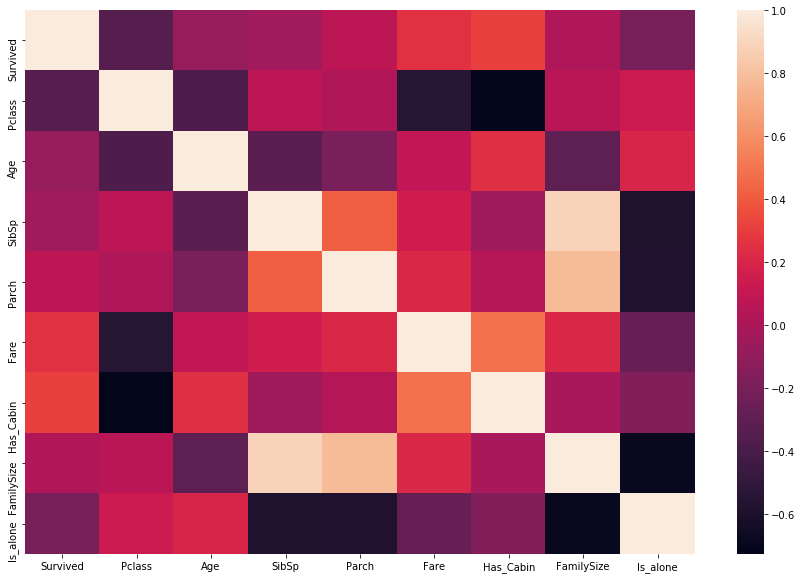

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(all_data.corr())

In [ ]:
# Преобразование категориальных данных в числовую форму
# Перевод в числовой вид Title
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
all_data['Title'] = all_data['Title'].map(title_mapping)
all_data['Title'] = all_data['Title'].fillna(0)

In [ ]:
# Перевод в числовой вид Sex
map_dict_sex = {'male': 1 , 'female': 0}

all_data['Sex'] = all_data['Sex'].map(map_dict_sex)

In [ ]:
# Перевод в числовой вид Embarked
map_dict_embarked = {'S': 0 , 'C': 1, 'Q':2}

all_data['Embarked'] = all_data['Embarked'].map(map_dict_embarked)


In [ ]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,FamilySize,Is_alone,Title
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0.0,0,2,0,1
2,1,1,0,38.0,1,0,71.2833,1.0,1,2,0,3
3,1,3,0,26.0,0,0,7.9250,0.0,0,1,1,4
4,1,1,0,35.0,1,0,53.1000,0.0,1,2,0,3
5,0,3,1,35.0,0,0,8.0500,0.0,0,1,1,1


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null float64
Has_Cabin     891 non-null int64
FamilySize    891 non-null int64
Is_alone      891 non-null int64
Title         891 non-null int64
dtypes: float64(3), int64(9)
memory usage: 130.5 KB


In [ ]:
# Избавление от редких пропусков
all_data['Fare']  = all_data['Fare'].fillna(value = all_data['Fare'].median())
all_data['Embarked']  = all_data['Embarked'].fillna(value = 0)

In [ ]:
# Среднее арифметическое для возраста
all_data['Age']  = all_data['Age'].fillna(value = all_data['Age'].mean())

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null float64
Has_Cabin     891 non-null int64
FamilySize    891 non-null int64
Is_alone      891 non-null int64
Title         891 non-null int64
dtypes: float64(3), int64(9)
memory usage: 130.5 KB


In [ ]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,FamilySize,Is_alone,Title
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0.0,0,2,0,1
2,1,1,0,38.0,1,0,71.2833,1.0,1,2,0,3
3,1,3,0,26.0,0,0,7.9250,0.0,0,1,1,4
4,1,1,0,35.0,1,0,53.1000,0.0,1,2,0,3
5,0,3,1,35.0,0,0,8.0500,0.0,0,1,1,1


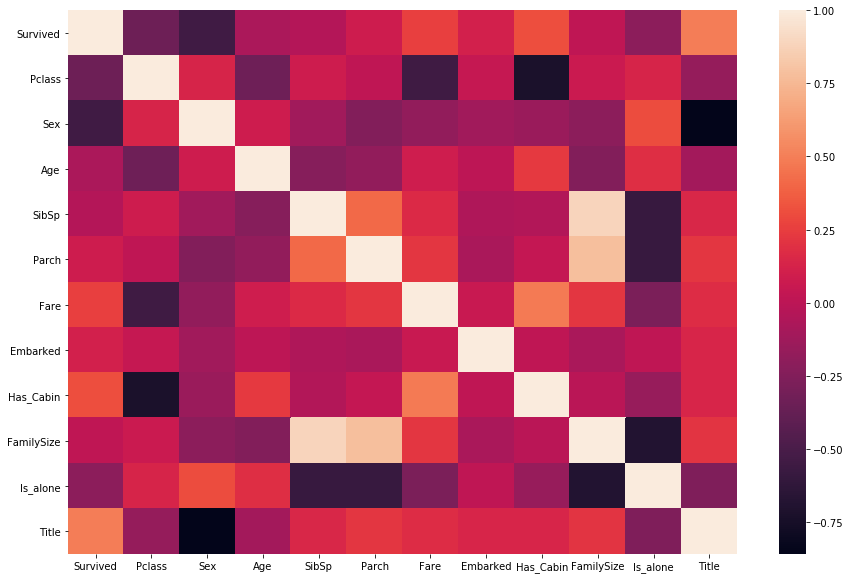

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(all_data.corr())